In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import requests
import plotly.express as px
from datetime import datetime
from bs4 import BeautifulSoup
import requests

In [2]:
#Selenium instaliacija
pip install selenium

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Biblioteku importas 
import selenium 
from selenium.webdriver.chrome.options import Options 
from selenium import webdriver 
from bs4 import BeautifulSoup
import time

In [51]:
# Chrome narsykles valdymas 

opcijos  = Options()
opcijos.add_argument('--incognito')       #kad narsykle turi startuoti incognito 
driver = webdriver.Chrome(options=opcijos)
url = 'https://www.varle.lt/dronai/'
driver.get(url)
time.sleep(5)                   #5 sekundes tolimesnis kodas nebus vykdomas 
source= driver.page_source      #pasiemame puslapio koda 
driver.close()


<html class="tablet tablet-and-down tablet-and-up desktop-and-down large-mobile-and-up" lang="lt"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0 maximum-scale=1.0" name="viewport"/>
<meta content="Ieškote drono filmavimui ar fotografijai? Varle.lt rasite įvairius dronų modelius ✴️ Vaikams, profesionalūs, galingi, sportiniai ➞ pasinaudokite geriausiais pasiūlymais jau šiandien!" name="description"/>
<meta content="https://www.varle.lt/static/varle_logo.jpg" property="og:image"/>
<title>Dronai | Su kamera ☀️ Kainos žemos internetu | Varle.lt</title>
<!-- jQuery -->
<script async="" charset="UTF-8" src="https://consentcdn.cookiebot.com/consentconfig/0944cdb4-abf2-4136-8631-d617060132a3/state.js" type="text/javascript"></script><script async="" charset="UTF-8" src="https://consent.cookiebot.com/logconsent.ashx?action=accept&amp;nocache=1728922424375&amp;dnt=false&amp;method=strict&amp;clp=true&amp;cls=true&amp;clm=true&amp;cbid=0944cdb4-abf2-4136-8631-d
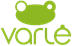

In [53]:
bs = BeautifulSoup(source, 'html.parser')   #isanalizuoja puslapi
print(bs)

In [54]:
sk = bs.find('div', {'class':'GRID_ITEM'}).find('a')                   #find suranda tik viena elementa
# print(sk['title'])

img = sk.find('img')
print(img['title'])



Dronas DJI Mini 2 SE Fly More Combo


In [55]:
# Surinkti iš kauno.diena.lt puslapio straipsnių pavadiniumų ilgius, 
# tam panaudoti selenium biblioteką. Surinktus duomenis surašyti į 
# SQLite duomenų bazę. Surašoma infromacija - pavadinimas, nuoroda į 
# straipsnį, žodžių kiekis pavadinime. SQLite lentelėje trys stulpeliai.

opcijos  = Options()
opcijos.add_argument('--incognito')       #kad narsykle turi startuoti incognito 
driver = webdriver.Chrome(options=opcijos)
url = 'https://kauno.diena.lt/?nauja'
driver.get(url)
time.sleep(5)                   #5 sekundes tolimesnis kodas nebus vykdomas 
source= driver.page_source      #pasiemame puslapio koda 
driver.close()

In [56]:
bs = BeautifulSoup(source, 'html.parser')   #isanalizuoja puslapi
print(bs)

<html class="js" dir="ltr" lang="lt" version="HTML+RDFa 1.1" xml:lang="lt" xmlns="http://www.w3.org/1999/xhtml" xmlns:content="http://purl.org/rss/1.0/modules/content/" xmlns:dc="http://purl.org/dc/terms/" xmlns:foaf="http://xmlns.com/foaf/0.1/" xmlns:og="http://ogp.me/ns#" xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#" xmlns:sioc="http://rdfs.org/sioc/ns#" xmlns:sioct="http://rdfs.org/sioc/types#" xmlns:skos="http://www.w3.org/2004/02/skos/core#" xmlns:xsd="http://www.w3.org/2001/XMLSchema#"><head profile="http://www.w3.org/1999/xhtml/vocab"><script src="https://pagead2.googlesyndication.com/pagead/managed/js/adsense/m202410080101/reactive_library_fy2021.js"></script><script async="" src="https://static.criteo.net/js/ld/publishertag.prebid.139.js" type="text/javascript"></script><script src="https://adx.adform.net/adx/?rp=3&amp;pv=1&amp;bWlkPTI3Mjc4MyZta3Y9dGlwYXM6cGlybWFzaXNfcHVzbGFwaXMmcm5kPTE3Mjg5MjI1MzAwNzk&amp;url=https%3A%2F%2Fkauno.diena.lt%2F%3Fnauja&amp;gdpr=1&amp;gdpr_co

In [57]:
straipsniai = bs.find_all('div', {'class':'category-block-row grid-12 alpha omega unscore'})
print(straipsniai)

[<div class="category-block-row grid-12 alpha omega unscore">
<div class="grid-8 alpha articles-list-hot-row article">
<div class="articles-list-media">
<span class="file file-image file-image-jpeg">
<a href="naujienos/lietuva/politika/g-nauseda-bus-tam-tikru-pokyciu-bet-tokia-vyriausybe-i-gera-interviu-1195797"><img alt="G. Nausėda: bus tam tikrų pokyčių, bet tokia Vyriausybė – į gera &lt;span style=color:red;&gt;(interviu)&lt;/span&gt;" height="300px" src="https://kauno.diena.lt/sites/default/files/styles/620x300/public/Vilniausdiena/Vartotoju%20zona/eglmor/v_12_148.jpg?itok=QS7Y0Scj" width="620px"/><div class="media-icon-holder-big"></div></a><span class="kategorijos-info"><a href="naujienos/lietuva/politika/g-nauseda-bus-tam-tikru-pokyciu-bet-tokia-vyriausybe-i-gera-interviu-1195797">Politika</a></span></span>
</div>
<a class="articles-list-title" href="naujienos/lietuva/politika/g-nauseda-bus-tam-tikru-pokyciu-bet-tokia-vyriausybe-i-gera-interviu-1195797" style="font-size: 24px;li

In [59]:
#Surenkame pavadinimus ir nuorodas is puslapio
names, links = [], []
for s in straipsniai:
    i = s.find('div', {'class':'articles-list-title-wrapper'})
    if i is not None:
        t = i.find('a', {'class':'articles-list-title'})
        print(t)
        print(t['href'])
        print(t.text)
        names.append(t.text)
        links.append(t['href'])

<a class="articles-list-title" href="naujienos/lietuva/politika/lietuva-renka-nauja-valdzia-apylinkes-uzsidare-skaiciuojami-balsai-1195621" style="font-size: 16px;line-height: 1.2;margin-bottom: 10px;display: inline;">2024-ųjų Seimo rinkimai: laimėjo socdemai, antri – TS-LKD, treti – „Nemuno Aušra“ </a>
naujienos/lietuva/politika/lietuva-renka-nauja-valdzia-apylinkes-uzsidare-skaiciuojami-balsai-1195621
2024-ųjų Seimo rinkimai: laimėjo socdemai, antri – TS-LKD, treti – „Nemuno Aušra“ 
<a class="articles-list-title" href="naujienos/lietuva/politika/laukia-kova-vienmandatese-aiskeja-i-antraji-tura-pateke-kandidatai-1195683" style="font-size: 16px;line-height: 1.2;margin-bottom: 10px;display: inline;">Į antrąjį Seimo rinkimų turą patekę kandidatai <span style="color:red;">(apžvalga)</span></a>
naujienos/lietuva/politika/laukia-kova-vienmandatese-aiskeja-i-antraji-tura-pateke-kandidatai-1195683
Į antrąjį Seimo rinkimų turą patekę kandidatai (apžvalga)
<a class="articles-list-title" href="n

In [60]:
#Sukuria pilnus linkus i puslapius
print(names)
print(links)

full_links = []
for i in links: 
    a = 'https://kauno.diena.lt/'+str(i)
    full_links.append(a)
    
print(len(names))


['2024-ųjų Seimo rinkimai: laimėjo socdemai, antri – TS-LKD, treti – „Nemuno Aušra“ ', 'Į antrąjį Seimo rinkimų turą patekę kandidatai (apžvalga)', 'Kaune prasidėjo šildymo sezonas: šilumos kaina – viena mažiausių Lietuvoje', 'Trijulę įklampino machinacijos: pelnėsi iš dyzelino kuro', 'Vidury nakties Kaune pričiuptas kone mirtinai girtas vairuotojas', 'Vytėnų gyventojas: šviesoforas neveikia, neįmanoma išvažiuoti', '„Lidl Lietuva“: ir toliau didinsime parduotuvių bei logistikos centro darbuotojų atlyginimus', 'Akibrokštas privačiai greitajai pagalbai: 50 įdarbintų žmonių valstybei neįdomu?', 'Vyriausybė nepritaria, kad baigę gyvulininkystę teiktų sveikatos paslaugas su gyvūnais', 'Šeima – tarsi universitetas, kuriame mokomės iš artimųjų', 'L. Kasčiūno rinkimuose aplenktas G. Landsbergis: tai – nueinančio pirmininko efektas ', 'Laikinasis Jonavos meras R. Sinkevičius planuoja eiti dirbti į Seimą', 'Iš išaugtų vaikiškų drabužių – prisiminimų šiltukai', 'Mainų platformos įkūrėja: gyventi 

In [36]:
#Skaiciuojame zodzius pavadinimuose (skaiciuoja ir simbolius !!!)
zodziu_numb = []

for i in names:
    zodziu_skaicius = i.count(' ') - 1
    zodziu_numb.append(zodziu_skaicius)
    
print(zodziu_numb)
print(len(zodziu_numb))

[11, 6, 8, 5, 6, 4, 9, 7, 8, 6, 10, 8, 5, 7, 4, 10, 11, 8, 7, 6, 8, 3, 4, 3, 7, 3, 13, 4, 3]
29


In [38]:
# Suzipiname i sarasa po 3
list(zip(names, links, zodziu_numb))

[('2024-ųjų Seimo rinkimai: laimėjo socdemai, antri – TS-LKD, treti – „Nemuno Aušra“ ',
  'naujienos/lietuva/politika/lietuva-renka-nauja-valdzia-apylinkes-uzsidare-skaiciuojami-balsai-1195621',
  11),
 ('Į antrąjį Seimo rinkimų turą patekę kandidatai (apžvalga)',
  'naujienos/lietuva/politika/laukia-kova-vienmandatese-aiskeja-i-antraji-tura-pateke-kandidatai-1195683',
  6),
 ('Kaune prasidėjo šildymo sezonas: šilumos kaina – viena mažiausių Lietuvoje',
  'naujienos/kaunas/miesto-pulsas/kaune-prasidejo-sildymo-sezonas-silumos-kaina-viena-maziausiu-lietuvoje-1195785',
  8),
 ('Trijulę įklampino machinacijos: pelnėsi iš dyzelino kuro',
  'naujienos/kaunas/nusikaltimai-ir-nelaimes/trijule-iklampino-machinacijos-pelnesi-dyzelino-kuro-1195765',
  5),
 ('Vidury nakties Kaune pričiuptas kone mirtinai girtas vairuotojas',
  'naujienos/kaunas/nusikaltimai-ir-nelaimes/vidury-nakties-kaune-priciuptas-kone-mirtinai-girtas-vairuotojas-1195581',
  6),
 ('Vytėnų gyventojas: šviesoforas neveikia, neįm

In [46]:
#Sudedame viska i SQLite duombaze
import sqlite3

SDB = sqlite3.connect('41UzduotiesDuombaze.db')
Cs = SDB.cursor()

sql = 'Drop table if exists KaunoDiena'             #istriname duonbaze jei tokia yra
Cs.execute(sql)

sql = '''create table if not exists KaunoDiena (
    pavadinimas text not null,
    nuoroda text not null,
    zodziai integer not null
)'''
Cs.execute(sql)

sql_template = '''insert into KaunoDiena values (?,?,?)'''
data = list(zip(names, full_links, zodziu_numb))
Cs.executemany(sql_template, data)
SDB.commit()
SDB.close()
